## Introduction to Computer Vision
### Fashion MNIST and Handwritten Digit Recognition
Part1: Fashion MNIST with a simple neural network  
Part2: Handwritten digit recognition with a simple neural network

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Fashion MNIST
### Load dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

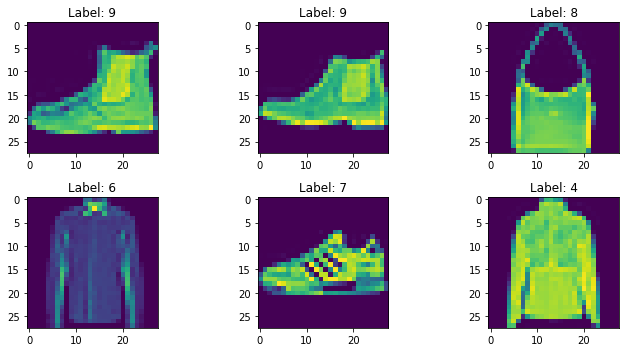

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,5))
axes = np.reshape(axes, -1)
rand_indices = np.random.randint(0, X_train.shape[0], len(axes))
for ax, ind in zip(axes, rand_indices):
    ax.imshow(X_train[ind])
    ax.set_title(f"Label: {y_train[ind]}")
plt.tight_layout()

In [4]:
X_train.shape

(60000, 28, 28)

### Normalizing

In [5]:
X_train = X_train/255
X_test = X_test/255

### Train a 1-hidden layer neural network on fashion_mnist dataset

In [6]:
%%time
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), loss="sparse_categorical_crossentropy")
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 182us/step - loss: 0.4964
Epoch 2/5
60000/60000 [==============================] - 6s 102us/step - loss: 0.3742
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.3333
Epoch 4/5
60000/60000 [==============================] - 6s 103us/step - loss: 0.3097
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.2915
Wall time: 37.3 s


In [32]:
loss = model.evaluate(X_test, y_test)
print(f"Accuracy: {np.round((1-loss)*100,2)}%")

10000/10000 [==============================] - 1s 58us/step
Accuracy: 64.6%


### Callback
#### Use callback to record the training losses

Epoch 1/3
60000/60000 [==============================] - 8s 137us/step - loss: 0.5028
Epoch 2/3
60000/60000 [==============================] - 8s 126us/step - loss: 0.3737
Epoch 3/3
60000/60000 [==============================] - 8s 126us/step - loss: 0.3385
Wall time: 23.7 s


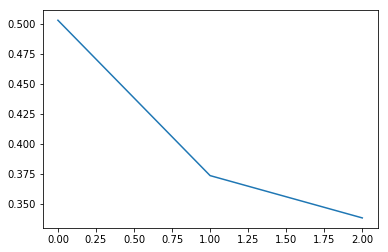

In [22]:
%%time
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
    def on_epoch_end(self, epoch, logs={}):
        self.loss.append(logs.get('loss'))
history = LossHistory()  
epochs = 3
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs=epochs, callbacks=[history])

plt.plot(list(range(epochs)), history.loss)
        

#### Use callback to stop the training when loss reaches 0.3

Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.4980
Epoch 2/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.3741
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.3354
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.3148
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.2957
Converged in 4 epochs


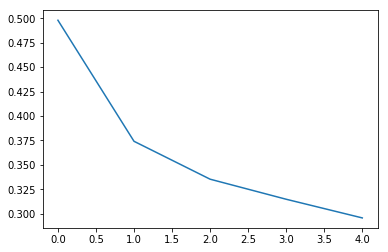

In [20]:
# Callback class to terminate training after required loss is achieved and to record loss
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs={}):
        self.loss = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.loss.append(logs.get('loss'))
        if logs.get('loss') < 0.3:            
            print(f"Converged in {epoch} epochs")
            self.model.stop_training = True

history = LossHistory()    
epochs = 10
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs=epochs, callbacks=[history])
plt.plot(list(range(len(history.loss))), history.loss);

## Handwritten Digit Recognition
Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
If you add any additional variables, make sure you use the same names as the ones used in the class

In [29]:
# Load dataset
digits = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits.load_data()

# Normalize the data
X_train = X_train/256
X_test = X_test/256

# Create callback to stop at 99% accuracy
class loss(keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, log={}):
        if log.get('acc')>=0.99:
            print(f"99% accurached at {epoch} epochs")
            self.model.stop_training = True
            
Loss = loss()
# Create model
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, callbacks=[Loss])

Epoch 1/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.2649 - acc: 0.9250
Epoch 2/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.1163 - acc: 0.9652
Epoch 3/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.0791 - acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0581 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 8s 135us/step - loss: 0.0456 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.0354 - acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0279 - acc: 0.9914
99% accurached at 6 epochs
